# Creating a Kaggle Workflow

#### Darren Ho

## Introducting Data Science Workflow

In this project, we're going to put together all that we have learned and create a data science workflow. By defining a workflow, we can give ourselves a framework with which to make iterating on ideas quicker and easier, allow ourselves to work more efficiently. 

In this project, we're going to explore a workflow to make competing in the Kaggle Titanic competition easier, using a pipeline of functions to reduce the number of dimensions we need to focus on. 

To get started, we'll read in the original files from Kaggle. 

In [1]:
import pandas as pd
import numpy as np
# training data and testing/holdout data
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

# first few lines
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print('Training Data')
print('Number of Rows:', train.shape[0])
print('Number of Columns:',  train.shape[1])
print('----------------------')
print('Holdout/Testing Data')
print('Number of Rows:', holdout.shape[0])
print('Number of Columns:',  holdout.shape[1])

Training Data
Number of Rows: 891
Number of Columns: 12
----------------------
Holdout/Testing Data
Number of Rows: 418
Number of Columns: 11


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
holdout.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Preprocessing the Data

We have created a file, `functions.py` which contains versions of the functions we created and used on previous Titanic submissions. This will save us time from building those functions again from scratch.

Let's import that file and preprocess our Kaggle data. 

In [8]:
# %load command allows us to load external file: will copy contents of the file into current notebook cell
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [9]:
# accepts df parameter
def preprocess(df):
    
    # applies functions to df
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    
    # applies create_dummies func to cols
    for col in ['Age_categories', 'Fare_categories', 'Title', 'Cabin_type', 'Sex']:
        df = create_dummies(df, col)
        
    # returns processed df
    return df

In [10]:
# applying new func on train and holdout dfs

train = preprocess(train)

holdout = preprocess(holdout)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1


## Exploring the Data


The Kaggle workflow we are going to build will combine `Exploring the data`, `Creating features`, `Selecting Features`, `Selecting and Tuning different models` into a process. 

Fow now, let's practice the first stage, `exploring the data`. We're going to examine the two columns that contain information about the family memebers each passenger had onboard: `SibSp` and `Parch`.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# inspecting type of the cols
train[['SibSp', 'Parch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SibSp   891 non-null    int64
 1   Parch   891 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


In [13]:
# checking value counts
train['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [14]:
# checking value counts
train['Parch'].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

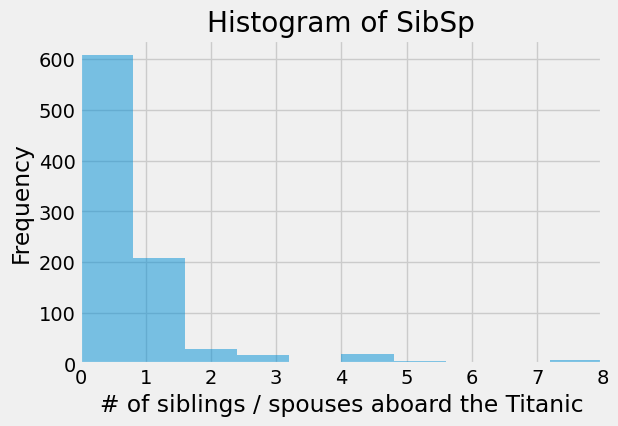

In [15]:
# plotting hist to view distribution of values in col

plt.style.use('fivethirtyeight')
plt.hist(train['SibSp'], alpha=0.5)
plt.title('Histogram of SibSp')
plt.xlim(0, 8)
plt.ylabel('Frequency')
plt.xlabel('# of siblings / spouses aboard the Titanic')
plt.show()

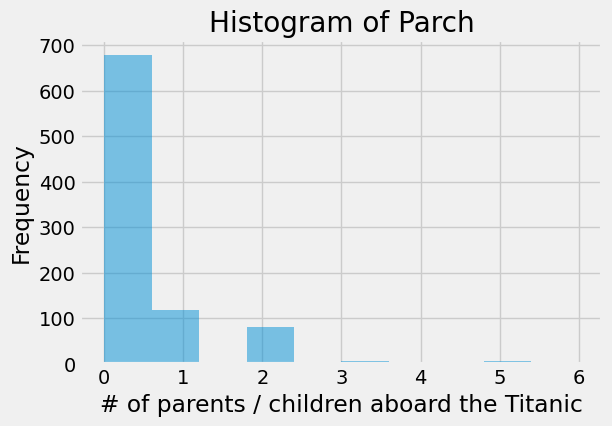

In [16]:
# plotting hist to view distribution of values in col

plt.hist(train['Parch'], alpha=0.5)
plt.title('Histogram of Parch')
plt.ylabel('Frequency')
plt.xlabel('# of parents / children aboard the Titanic')
plt.show()

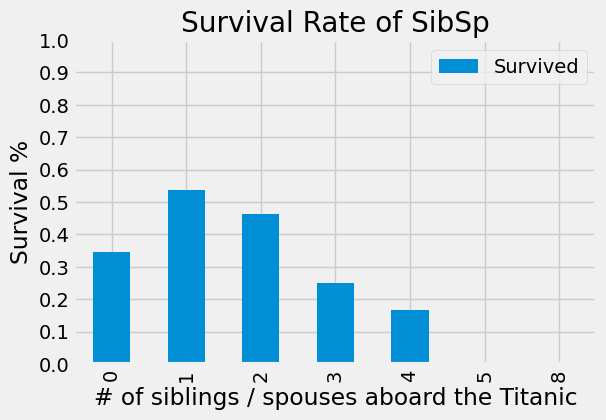

In [17]:
# pivot table to look at survival rate for diff values of col

sibsp_pivot = pd.pivot_table(train, values='Survived', index=['SibSp'])
sibsp_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1.1,.1))
plt.title('Survival Rate of SibSp')
plt.ylabel('Survival %')
plt.xlabel('# of siblings / spouses aboard the Titanic')
plt.show()

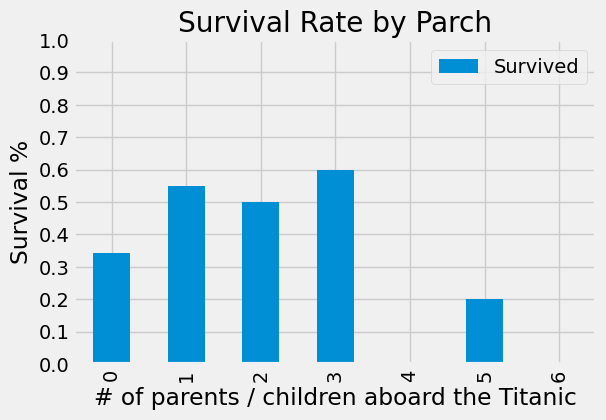

In [18]:
# pivot table to look at survival rate for diff values of col

parch_pivot = pd.pivot_table(train, values='Survived', index=['Parch'])
parch_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1.1,.1))
plt.title('Survival Rate by Parch')
plt.ylabel('Survival %')
plt.xlabel('# of parents / children aboard the Titanic')
plt.show()

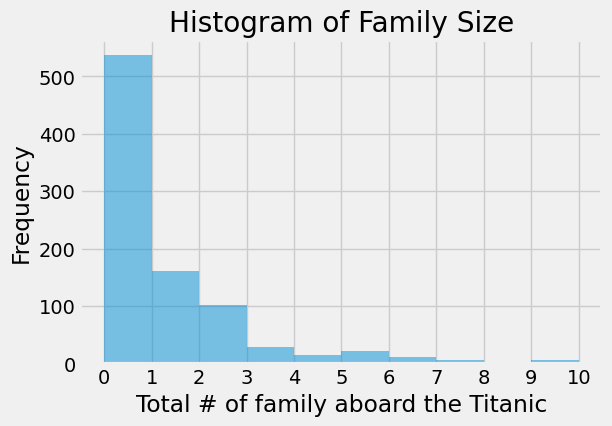

In [19]:
# combine cols to look at resulting distribution of values and survival rate

explore = train[["SibSp","Parch","Survived"]].copy()
explore['total_family'] = explore[["SibSp","Parch"]].sum(axis=1)
explore['total_family'].plot.hist(alpha=0.5,bins=10)
plt.title('Histogram of Family Size')
plt.ylabel('Frequency')
plt.xlabel('Total # of family aboard the Titanic')
plt.xticks(range(11))
plt.show()

In [20]:
explore['total_family'].value_counts(normalize=True)

0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: total_family, dtype: float64

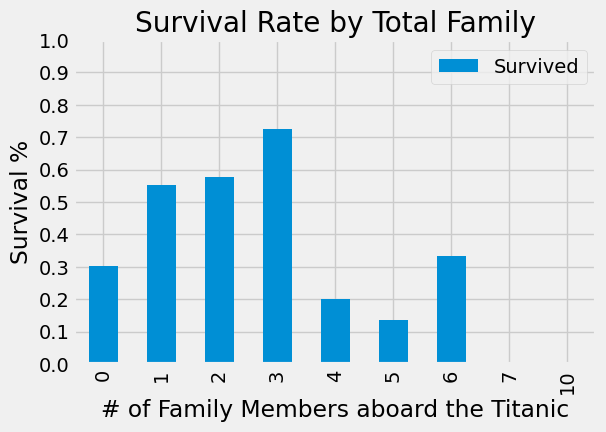

In [21]:
fam_pivot = pd.pivot_table(explore, values='Survived', index=['total_family'])
fam_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1.1,.1))
plt.title('Survival Rate by Total Family')
plt.ylabel('Survival %')
plt.xlabel('# of Family Members aboard the Titanic')
plt.show()

The `SibSp` column shows the number of siblings and/or spouses each passenger had on board, while the `Parch` columns shows the number of parents or children each passenger had onboard. Neither column has any missing values. The distribution of values in both columns is skewed right, with the majority of values being zero.

Two pivot tables were created to look at the survival rate for different values of `SibSp` and `Parch`. For `SibSp`, we see that passengers aboard the Titanic with 1 other sibling/spouse were most likely to survive, whereas passengers with 4 other siblings/spouses aboard were least likely. For `Parch`, we see that passengers aboard the Titanic with 3 parents/children aboard were most likely to survive, whereas passengers with 5 other parents/children aboard were least likely. 

Finally, we combined the `SibSp` and `Parch` columns together to create `total_family` where it represented the total amount of family members aboard the Titanic. The shape of the distribution remained similar to our first two histograms, however the number of values being 0 decreased. The pivot table for `total_family` shows us that passengers with 3 family members abord the Titanic were most likely to survive, whereas those with 5 members were least likely.  

## Engineering New Features

By plotting the pivot table of `total_family`, we discovered that only 30% of the passengers who had no family members onboard survived. 

Based on this, we can come up with an idea for a new feature - was the passenger alone. This will be a binary column containing the values:

- `1` if the passenger has zero family members onboard
- `0` if the passenger has one or more family members onboard

In [22]:
# func accepts df as input

def process_isalone(df):
    
    # combines SibSp and Parch into total_family
    df["total_family"] = df[["SibSp","Parch"]].sum(axis=1)
    
    # set every row in new column `isalone` to 0
    df["isalone"] = 0
    
    # locate rows where total_family equals 0 and set `isalone` to 1
    df.loc[(df["total_family"] == 0),"isalone"] = 1
    
    # drop total_family
    df = df.drop("total_family",axis=1)
    return df

In [23]:
# apply newly created func to the train and holdout df

train = process_isalone(train)
holdout = process_isalone(holdout)

In [24]:
train['isalone'].value_counts(normalize=True)

1    0.602694
0    0.397306
Name: isalone, dtype: float64

In [25]:
holdout['isalone'].value_counts(normalize=True)

1    0.605263
0    0.394737
Name: isalone, dtype: float64

## Selecting the Best-Performing Features

The next step in our workflow is feature selection. To speed up our Kaggle workflow, we can create a function that performs this step for us, which will mean we can perform feature selection by calling a self-contained function and focus our efforts on exploring the data and engineering new features. 

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    
    # removes any non numeric cols or cols containing nulls
    df = df.select_dtypes([np.number]).dropna(axis=1)
    
    # all_X contains all feature cols besides Survived & PassengerID
    all_X = df.drop(["Survived","PassengerId"],axis=1)
    all_y = df['Survived']
    
    # Instantiate 
    clf = RandomForestClassifier(random_state=1)
    
    # perform recursive feature elimination
    selector = RFECV(clf, cv=10)
    selector.fit(all_X, all_y)
    
    # prints a list of the best cols from recursive feature elimination
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

In [27]:
# appplying new func using the `train` df as input 

best_cols = select_features(train)

Best Columns 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']



## Selecting and Tuning Different Algorithms

Just like we did with feature selection, we can write a function to do the heavy lifting of model selection and tuning. The function we'll create will use three different algorithms and use grid search to train using different combinations of hyperparameters to find the best performing model.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# func that accepts df and list of features as input
def select_model(df, features):
    
    # all_X contains only the features in the input param / all_y is target
    all_X = df[features]
    all_y = df["Survived"]
    
    #contains list of dicts, each containing model name, its estimator and dict of hyperparameters
    models = [
        {
            'name': 'LogisticRegression',
            'estimator': LogisticRegression(),
            'hyperparameters':
            {
                'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'max_iter': [1000, 1500, 2000]
            }
        },
        
        {
            'name': 'KNeighborsClassifier',
            'estimator': KNeighborsClassifier(),
            'hyperparameters':
            {
                'n_neighbors': range(1,20,2),
                'weights': ['distance', 'uniform'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                'p': [1,2]
            }
        },
        
        
        {
            'name': 'RandomForestClassifier',
            'estimator': RandomForestClassifier(),
            'hyperparameters':
            {
                'n_estimators': [4, 6, 9],
                'criterion': ['entropy', 'gini'],
                'max_depth': [2, 5, 10],
                'max_features': ['log2', 'sqrt'],
                'min_samples_leaf': [1, 5, 8],
                'min_samples_split': [2, 3, 5]
            }
        } 
    ]
    
    # iterating over list of dicts, and for each dict
    for model in models:
        # print name of model
        print(model['name'])
        # instantiate GridSearchCV using model, hyperparams, and 10 fold CV
        grid = GridSearchCV(model["estimator"], param_grid=model["hyperparameters"], cv=10)
        # fit GridSearchCV
        grid.fit(all_X, all_y)
        # assign params and score for best model to dict
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        # assign best estimator for best model to dict
        model["best_model"] = grid.best_estimator_
        # print params and score for the best model
        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
        
    return models

In [29]:
# applying new function using train df and the output of select_features() as inputs

result = select_model(train, best_cols)

LogisticRegression
Best Score: 0.8204619225967541
Best Parameters: {'max_iter': 1000, 'solver': 'newton-cg'}

KNeighborsClassifier
Best Score: 0.7767041198501874
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
Best Score: 0.8361548064918851
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}



Running the `select_model` function retuns three models and it's `Best Score` and `Best Parameters`.

The `Best Parameters` for a `LogisticRegression` model are `max_iter = 1000` and `solver = newton-cg`, and returns a mean cross-validated score of approximately 0.82. 

The `Best Parameters` for a `KNeighborsClassifier` model are `algorithm = brute`, `n_neighbors = 5`, `p = 1`, and `weights = uniform`, and returns a mean cross-validated score of approximately 0.777. 

The `Best Parameters` for a `RandomForestClassifier` model are `criterion = gini`, `max_depth = 10`, `max_features = sqrt`, `min_samples_leaf = 5`, `min_samples_split = 2`, and `n_estimators = 9`, and returns a mean cross-validated score of approximately 0.836. 

## Making Submission to Kaggle

After running our function, we will have three scores from three different models. At this point in the workflow we have a decision to make: Do we want to train our best model on the holdout set and make a Kaggle submission, or do we want to go back to engineering features.

We may find that adding a feature to our model does not improve our accuracy. In that case, we should go back to data exploration and repeat the cycle again.

If we're going to be continually submitting to Kaggle, a function will help make things easier by automating this process. 

In [30]:
# func accepts trained model and list of columns as required arguments & optional filename argument

def save_submission_file(model, cols, filename="submission.csv"):
    
    # uses model to make predictions on the holdout df using cols specified
    holdout_data = holdout[cols]
    predictions = model.predict(holdout_data)
    
    # transforms predictions into a submission df with PassengerID & Survived columns as specified by Kaggle
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
    submission = pd.DataFrame(submission_df)
    
    # saves df to a csv
    submission.to_csv(filename,index=False)

In [31]:
# retrieve best performing model from variable returned by select_model

best_model = result[2]["best_model"]
save_submission_file(best_model, best_cols)

## Next Steps

In this guided project, we created a reproducible workflow to help us iterate over ideas and continue to improve the accuracy of our predictions. We also created helper functions which will make feature selection, model selection/tuning and creating submissions much easier as we continue to explore the data and create new features.

Some next steps to take this project further:

- Continue to explore the data and create new features, following the workflow and using the functions we created
- Read more about the titanic and this Kaggle competition to get ideas for new features
- Use some different algorithms in the select_model() function, like support vector machines, stochastic gradient descent or perceptron linear models
- Experiment with RandomizedSearchCV instead of GridSearchCV to speed up your select_features() function